In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [2]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

Using TensorFlow backend.
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(

In [3]:
from evaluate import load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

In [4]:
from data_gen import data
from run import characterize_data
from config import config

In [5]:
UUID = "7956d353-e8a6-47b6-a13c-52b782a16690"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [6]:
SELECTIONS = eval(SELECTIONS)

In [7]:
result = Result.query.filter(Result.uuid == UUID).first()

In [8]:
print("input form:", result.input_form)

input form: t1c-features


In [9]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [10]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  1%|▏         | 3/240 [00:00<01:13,  3.24it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-132, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-132-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-132-t1c-imagingVolume.nrrd'


######################################################

  2%|▎         | 6/240 [00:01<00:58,  3.99it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   0.000
Name: china019, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china019-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china019-t1c-imagingVolume.nrrd'


######################################################

  3%|▎         | 8/240 [00:01<00:48,  4.77it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-040, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-040-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-040-t1c-imagingVolume.nrrd'



  5%|▍         | 11/240 [00:02<00:45,  4.98it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-044, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-044-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-044-t1c-imagingVolume.nrrd'



  6%|▌         | 14/240 [00:02<00:40,  5.60it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-036, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-036-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-036-t1c-imagingVolume.nrrd'


######################################################

  8%|▊         | 18/240 [00:03<00:37,  5.93it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-99, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-99-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-99-t1c-imagingVolume.nrrd'



  9%|▉         | 21/240 [00:04<00:41,  5.27it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-062, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-062-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-062-t1c-imagingVolume.nrrd'


######################################################

 10%|▉         | 23/240 [00:05<01:19,  2.71it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-57, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-57-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-57-t1c-imagingVolume.nrrd'



 11%|█         | 26/240 [00:05<00:57,  3.71it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-142, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-142-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-142-t1c-imagingVolume.nrrd'



 12%|█▏        | 28/240 [00:06<00:54,  3.90it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-028, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-028-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-028-t1c-imagingVolume.nrrd'



 12%|█▎        | 30/240 [00:06<00:48,  4.37it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-017, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-017-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-017-t1c-imagingVolume.nrrd'



 14%|█▍        | 33/240 [00:07<00:44,  4.66it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-15, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-15-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-15-t1c-imagingVolume.nrrd'


#########################################################

 15%|█▌        | 37/240 [00:08<00:46,  4.39it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-119, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-119-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-119-t1c-imagingVolume.nrrd'



 16%|█▋        | 39/240 [00:09<00:51,  3.91it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-007, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-007-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-007-t1c-imagingVolume.nrrd'



 18%|█▊        | 42/240 [00:09<00:38,  5.17it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china067, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china067-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china067-t1c-imagingVolume.nrrd'


######################################################

 19%|█▉        | 45/240 [00:09<00:37,  5.16it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-40, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-40-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-40-t1c-imagingVolume.nrrd'



 20%|██        | 49/240 [00:10<00:26,  7.31it/s]


################################################################################
Exception occurred for: sort          -
volume    0.606
outcome   0.000
Name: china133, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china133-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china133-t1c-imagingVolume.nrrd'


######################################################

 22%|██▏       | 52/240 [00:11<00:50,  3.75it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china091, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china091-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china091-t1c-imagingVolume.nrrd'


######################################################

 23%|██▎       | 55/240 [00:12<00:33,  5.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-43, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-43-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-43-t1c-imagingVolume.nrrd'


#########################################################

 25%|██▌       | 60/240 [00:13<00:54,  3.30it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-78, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-78-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-78-t1c-imagingVolume.nrrd'



 26%|██▋       | 63/240 [00:13<00:37,  4.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-64, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-64-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-64-t1c-imagingVolume.nrrd'


#########################################################

 28%|██▊       | 67/240 [00:14<00:25,  6.87it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china099, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china099-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china099-t1c-imagingVolume.nrrd'


######################################################

 29%|██▉       | 70/240 [00:14<00:33,  5.14it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china011, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china011-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china011-t1-imagingVolume.nrrd'



 32%|███▏      | 76/240 [00:15<00:25,  6.41it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-135, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-135-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-135-t1c-imagingVolume.nrrd'



 32%|███▏      | 77/240 [00:15<00:31,  5.18it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china030, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china030-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china030-t1c-imagingVolume.nrrd'


######################################################

 34%|███▍      | 82/240 [00:16<00:21,  7.33it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china072, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china072-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china072-t1c-imagingVolume.nrrd'


######################################################

 38%|███▊      | 90/240 [00:18<00:26,  5.64it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-38, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-38-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-38-t1c-imagingVolume.nrrd'



 42%|████▎     | 102/240 [00:21<00:43,  3.20it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-042, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-042-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-042-t1c-imagingVolume.nrrd'


######################################################

 45%|████▍     | 107/240 [00:23<00:49,  2.70it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-104, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-104-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-104-t1c-imagingVolume.nrrd'



 48%|████▊     | 114/240 [00:27<00:34,  3.65it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-083, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-083-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-083-t1c-imagingVolume.nrrd'



 48%|████▊     | 115/240 [00:28<00:47,  2.61it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-17, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-17-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-17-t1c-imagingVolume.nrrd'



 49%|████▉     | 117/240 [00:28<00:38,  3.23it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-56, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-56-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-56-t1c-imagingVolume.nrrd'



 50%|████▉     | 119/240 [00:28<00:29,  4.10it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-25, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-25-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-25-t1c-imagingVolume.nrrd'



 50%|█████     | 121/240 [00:29<00:26,  4.46it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-124, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-124-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-124-t1c-imagingVolume.nrrd'


######################################################

 52%|█████▏    | 125/240 [00:29<00:18,  6.26it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-30, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-30-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-30-t1c-imagingVolume.nrrd'


#########################################################

 53%|█████▎    | 128/240 [00:29<00:15,  7.02it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china048, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china048-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china048-t1-imagingVolume.nrrd'



 57%|█████▊    | 138/240 [00:31<00:14,  6.83it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china147, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china147-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china147-t1c-imagingVolume.nrrd'


######################################################

 60%|█████▉    | 143/240 [00:32<00:15,  6.18it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china153, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china153-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china153-t1c-imagingVolume.nrrd'



 60%|██████    | 144/240 [00:32<00:15,  6.35it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-133, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-133-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-133-t1c-imagingVolume.nrrd'



 62%|██████▏   | 148/240 [00:33<00:11,  7.78it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china035, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china035-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china035-t1c-imagingVolume.nrrd'



 63%|██████▎   | 151/240 [00:33<00:16,  5.51it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-010, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-010-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-010-t1-imagingVolume.nrrd'


############################################################

 72%|███████▎  | 174/240 [00:37<00:10,  6.22it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-018, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-018-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-018-t1c-imagingVolume.nrrd'



 78%|███████▊  | 188/240 [00:43<00:20,  2.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china152, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china152-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china152-t1c-imagingVolume.nrrd'



 80%|████████  | 192/240 [00:44<00:09,  5.03it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-082, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-082-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-082-t1c-imagingVolume.nrrd'



 81%|████████  | 194/240 [00:44<00:08,  5.29it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: penn-049, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-049-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-049-t1c-imagingVolume.nrrd'



 81%|████████▏ | 195/240 [00:45<00:10,  4.45it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china024, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china024-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china024-t1-imagingVolume.nrrd'


############################################################

 85%|████████▌ | 204/240 [00:46<00:04,  8.64it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-003, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-003-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-003-t1-imagingVolume.nrrd'


############################################################

 86%|████████▌ | 206/240 [00:47<00:07,  4.36it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china041, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china041-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china041-t1c-imagingVolume.nrrd'



 87%|████████▋ | 209/240 [00:47<00:06,  4.94it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-107, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-107-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-107-t1c-imagingVolume.nrrd'


######################################################

 90%|████████▉ | 215/240 [00:48<00:03,  7.11it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china046, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china046-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china046-t1c-imagingVolume.nrrd'



 92%|█████████▏| 221/240 [00:49<00:03,  5.19it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china090, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china090-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china090-t1c-imagingVolume.nrrd'


######################################################

 94%|█████████▍| 225/240 [00:50<00:04,  3.22it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china038, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china038-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china038-t1c-imagingVolume.nrrd'



 95%|█████████▍| 227/240 [00:51<00:03,  3.87it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-089, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-089-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-089-t1c-imagingVolume.nrrd'



 96%|█████████▋| 231/240 [00:53<00:03,  2.46it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: chop-50, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-50-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-50-t1-imagingVolume.nrrd'


###############################################################

 98%|█████████▊| 234/240 [00:54<00:01,  3.87it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china002, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china002-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china002-t1c-imagingVolume.nrrd'



 98%|█████████▊| 236/240 [00:54<00:00,  5.05it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china058, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china058-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china058-t1c-imagingVolume.nrrd'


######################################################

  3%|▎         | 2/67 [00:00<00:04, 14.77it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-074, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-074-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-074-t1c-imagingVolume.nrrd'


######################################################

  7%|▋         | 5/67 [00:00<00:04, 12.80it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-86, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-86-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-86-t1c-imagingVolume.nrrd'


#########################################################

 21%|██        | 14/67 [00:02<00:14,  3.68it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-61, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-61-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-61-t1c-imagingVolume.nrrd'


#########################################################

 25%|██▌       | 17/67 [00:03<00:09,  5.02it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-126, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-126-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-126-t1c-imagingVolume.nrrd'


######################################################

 30%|██▉       | 20/67 [00:03<00:07,  6.20it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-87, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-87-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-87-t1c-imagingVolume.nrrd'



 33%|███▎      | 22/67 [00:03<00:06,  6.87it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-063, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-063-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-063-t1c-imagingVolume.nrrd'



 34%|███▍      | 23/67 [00:04<00:08,  4.96it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china023, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china023-t1-imagingVolume.nrrd'



 42%|████▏     | 28/67 [00:04<00:05,  7.37it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-46, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-46-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-46-t1-imagingVolume.nrrd'


###############################################################

 45%|████▍     | 30/67 [00:04<00:04,  7.83it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china001, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china001-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china001-t1c-imagingVolume.nrrd'



 55%|█████▌    | 37/67 [00:06<00:05,  5.21it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china040, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china040-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china040-t1c-imagingVolume.nrrd'


######################################################

 67%|██████▋   | 45/67 [00:07<00:03,  5.76it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-140, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-140-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-140-t1c-imagingVolume.nrrd'



 76%|███████▌  | 51/67 [00:08<00:02,  5.51it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: chop-113, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-113-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-113-t1c-imagingVolume.nrrd'


######################################################

 82%|████████▏ | 55/67 [00:09<00:02,  5.85it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china031, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china031-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china031-t1c-imagingVolume.nrrd'


######################################################

 87%|████████▋ | 58/67 [00:09<00:01,  6.25it/s]


################################################################################
Exception occurred for: sort          -
volume    0.604
outcome   1.000
Name: penn-019, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-019-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-019-t1c-imagingVolume.nrrd'


######################################################

 91%|█████████ | 61/67 [00:09<00:00,  7.88it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: china057, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china057-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china057-t1c-imagingVolume.nrrd'



  6%|▌         | 2/33 [00:00<00:03, 10.31it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: penn-008, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-008-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-008-t1-imagingVolume.nrrd'


############################################################

 15%|█▌        | 5/33 [00:00<00:02,  9.92it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-70, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-70-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-70-t1c-imagingVolume.nrrd'



 27%|██▋       | 9/33 [00:01<00:04,  5.22it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: chop-34, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-34-t1c-imagingVolume.nrrd'
T1C image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 383, in generate_from_features
    t1c_masked = load_image(t1c_image_file, t1c_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/chop-34-t1c-imagingVolume.nrrd'



 52%|█████▏    | 17/33 [00:03<00:03,  4.55it/s]


################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-037, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-037-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/penn-037-t1-imagingVolume.nrrd'



 82%|████████▏ | 27/33 [00:05<00:01,  3.49it/s]


################################################################################
Exception occurred for: sort          -
volume    0.605
outcome   1.000
Name: china098, dtype: object
[Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china098-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/sopeeweje/bone_master/data_gen.py", line 357, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/sopeeweje/bone_master/data_gen.py", line 313, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/sopeeweje/.local/share/virtualenvs/bone_master-xLR2Nuxv/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/home/sopeeweje/bone_master/data_dir/preprocessed/china098-t1-imagingVolume.nrrd'



100%|██████████| 33/33 [00:06<00:00,  4.80it/s]


In [14]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))
print(test.names)
print(test.labels)

training N: 154
validation N: 39
test N: 27
['china120', 'chop-28', 'penn-041', 'chop-2', 'chop-19', 'china020', 'penn-015', 'china093', 'china156', 'chop-138', 'china107', 'chop-69', 'chop-33', 'chop-117', 'china155', 'chop-121', 'penn-014', 'penn-058', 'china123', 'penn-053', 'china082', 'china115', 'penn-084', 'china108', 'chop-118', 'chop-92', 'china013']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [15]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training 1.0: 83
validation 1.0: 20
test 1.0: 14


In [18]:
model = load(MODEL)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
model

# Train

In [15]:
results = get_results(model, train)

In [16]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [17]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 1.0
Loss: 4.629478454589844


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,1.000,71,83,0,0,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000
1.000,1.000,83,71,0,0,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000


## Train confusion matrix

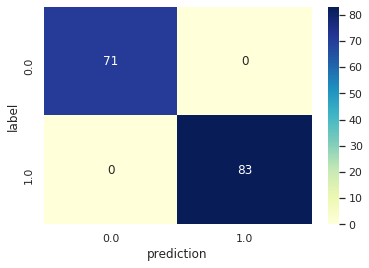

In [18]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train ROC curve

No handles with labels found to put in legend.


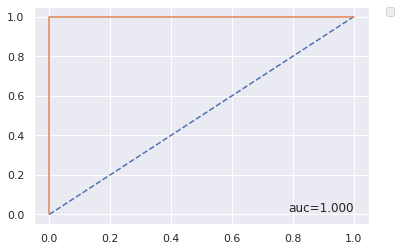

In [19]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

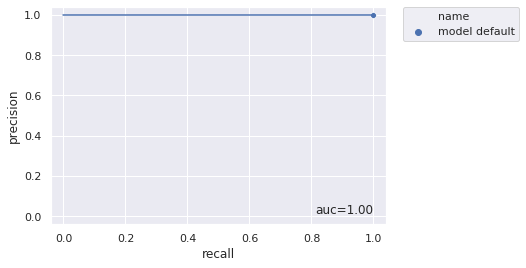

In [20]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Validation

In [21]:
results = get_results(model, validation)

In [22]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [23]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.6153846383094788
Loss: 4.736837863922119


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.615,7,17,3,12,0.368,0.850,0.700,0.586,0.150,0.632,0.300,0.609,0.560
1.000,0.615,17,7,12,3,0.850,0.368,0.586,0.700,0.632,0.150,0.414,0.609,0.560


## Validation confusion matrix

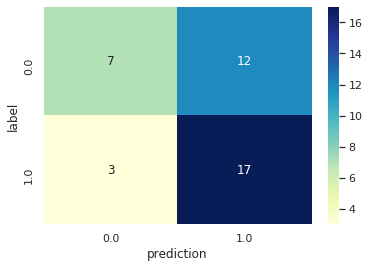

In [24]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation ROC curve

No handles with labels found to put in legend.


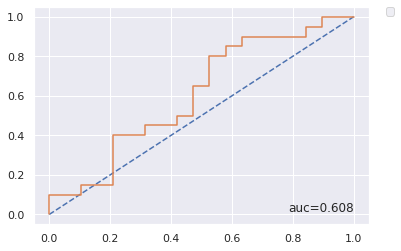

In [25]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

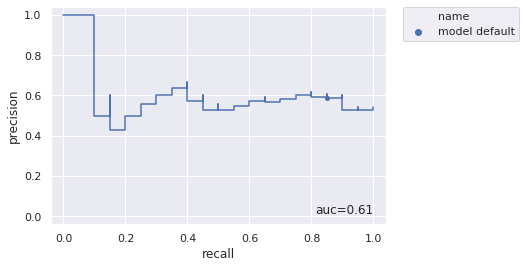

In [26]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Test

In [21]:
results = get_results(model, test)

In [26]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
names = test.names
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

TypeError: 'list' object is not callable

## Test statistics

In [29]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.40740740299224854
Loss: 5.355280876159668


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.407,4,7,7,9,0.308,0.500,0.364,0.438,0.500,0.692,0.636,0.404,0.392
1.000,0.407,7,4,9,7,0.500,0.308,0.438,0.364,0.692,0.500,0.562,0.404,0.392


## Test confusion matrix

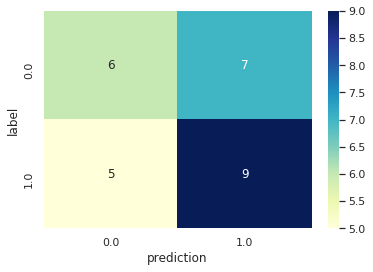

In [31]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test ROC curve

No handles with labels found to put in legend.


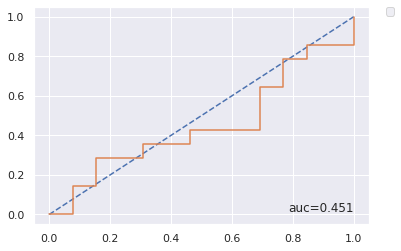

In [32]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

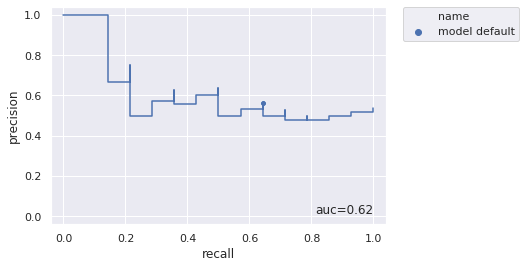

In [33]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

In [33]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

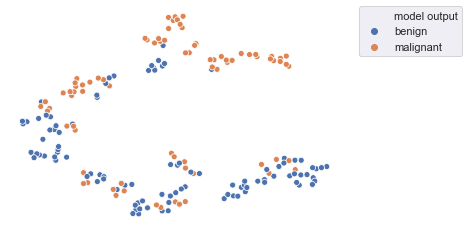

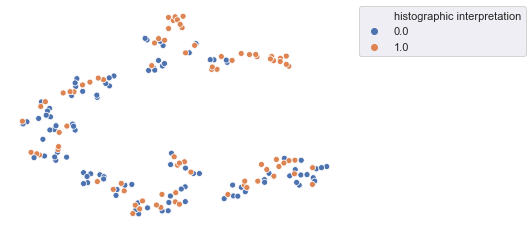

FileNotFoundError: [Errno 2] No such file or directory: 'figures/test2-t1-model-output-tsne.svg'

In [34]:
if result.input_form != "features": 
    layer = "dense_1"
    if deep_top: 
        layer = "dense_3"
    tsne_dataset = train
    tsne_dataset.reset()
    fieldnames = ["histographic interpretation"]
    tsne_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, tsne_dataset))]
    figs = plot_tsne(
        model, 
        layer, 
        tsne_dataset, 
        [tsne_results, tsne_dataset.labels], 
        fieldnames=["model output", *fieldnames], 
        perplexity=TSNE_PERPLEXITY,
    )
    for i, field in enumerate(["model output", *fieldnames]): 
        figs[i].savefig("figures/{}-{}-{}-tsne.svg".format(result.description, result.input_form, field.replace(" ", "-")), bbox_inches = "tight")
    tsne_dataset.reset()

# Grad Cam

In [ ]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [ ]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
if grad_cam_dataset.parameters["t1"]: 
    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
    plt.show()
if grad_cam_dataset.parameters["t2"]: 
    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, penultimate_layer="res5c_branch2c_t2", layer=grad_cam_layer)
    plt.show()

In [2]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

if SELECTIONS == None: 
    SELECTIONS = dict()

if grad_cam_dataset.parameters["t1"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t1
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])            
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
        fig.show()

if grad_cam_dataset.parameters["t2"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t2
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, penultimate_layer="res5c_branch2c_t2",include_label=False, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
        fig.show()

NameError: name 'test' is not defined

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')